In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import sys
import time
from IPython.display import HTML

In [37]:
import xxlimited


class Optimizer():
    """
    optimizer
    """
    def __init__(self,f,minx = -10,maxx=10,miny=-10,maxy=10,alpha = 2):
        self.f = f
        self.vals : list = []
        self.xs = []
        self.ys = []
        self.maxx =maxx
        self.maxy =maxy
        self.minx = minx
        self.miny = miny
        
        self.vx = 0
        self.vy = 0
        self.alpha = alpha
        
        return
    
    def grad(self,x,y,eps=0.001):
        f = self.f
        return (f(x+eps,y) - f(x,y),f(x,y+eps) - f(x,y))
    
    def step(self,x,y,lr = 2):
        dx,dy = self.grad(x,y)
        self.vx = self.alpha * self.vx - lr * dx
        self.vy = self.alpha * self.vy - lr * dy
        return (x + self.vx, y +self.vy)

    def optimize(self,x0,y0,lr=10,alpha = 0.9,train_num=500000):
        x,y = x0,y0
        xs : list[np.ndarray]= [x0]
        ys : list[np.ndarray]= [y0]
        vals = [self.f(x0,y0)]
        self.alpha = alpha
        num = train_num

        
        for i in range(num):
            if (i+1) % (num/200) == 0:
                sys.stdout.write("\r")
                sys.stdout.write(f"[{'#' * ((i+1) * 100 // num // 5) + '.' * (20 - ((i+1) * 100 // num // 5)) }]{(i+1) * 100 // num }%")

            x,y =self.step(x,y,lr=lr)
            xs.append(x)
            ys.append(y)
            vals.append(self.f(x,y))


        self.xs.append(xs)
        self.ys.append(ys)
        self.vals.append(vals)

        print()
        print(f"result:{vals[-1]} at {x,y},from{x0,y0}")
        return 
    
    def visualize(self):
        fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize=(24,16))

        for i in range(len(self.vals)):
            ax1.plot(list(range(len(self.vals[i]))),self.vals[i])

        ax1.set_title("value of f(x,y)",fontdict={"fontsize":24})
        x = np.linspace(self.minx,self.maxx,1000)
        y = np.linspace(self.miny,self.maxy,1000)

        xx,yy = np.meshgrid(x,y)
        z = self.f(xx,yy)


        cont = ax2.contour(xx,yy,z,50,cmap="PuOr",  zorder=-90)
        ax2.set_aspect("equal","box")
        plt.colorbar(cont)
        ax2.clabel(cont, inline=True, fontsize=10)

        print("plot route")
        for i in range(len(self.xs)):
            ax2.scatter(self.xs[i],self.ys[i],s=8,zorder = 800)
        
        ax2.set_title("f(x,y) = "+self.f.__doc__,fontdict={"fontsize":24})

        

        plt.tight_layout()
        plt.show()
        return

    def animate(self):
        plt.clf()


        lenhist = max([len(self.xs[i]) for i in range(len(self.xs))])
        for i in range(len(self.xs)):
            add = lenhist - len(self.xs[i]) + 10
            for j in range(add):
                self.xs[i].append(self.xs[i][-1])
                self.ys[i].append(self.ys[i][-1])


        

        def draw(i):
            i = int(i *( len(self.xs[0]) - 2) / 50)
            plt.clf()
            plt.title("value of f(x,y)",fontdict={"fontsize":24})
            x = np.linspace(self.minx,self.maxx,50)
            y = np.linspace(self.miny,self.maxy,50)

            xx,yy = np.meshgrid(x,y)
            z = self.f(xx,yy)


            cont = plt.contour(xx,yy,z,20,cmap="PuOr")
            plt.colorbar(cont)
            plt.clabel(cont, inline=True, fontsize=10)
                
            for j in range(len(self.xs)):
                
                plt.xlim(self.minx,self.maxx)
                plt.ylim(self.miny,self.maxy)
                plt.scatter(self.xs[j][i],self.ys[j][i],s=100,color="black",zorder = 90)
            



        fig = plt.figure()
        
        return  animation.FuncAnimation(fig,draw,frames=50,blit = False,interval=200)

        




        
        

[####################]100%
result:-0.24965630988136414 at (-2.900811755374594, 3.1038113870303956),from(-3.9, 1)
[####################]100%
result:-0.9796964289799048 at (-0.000499999993341499, 3.1038113870554476),from(-3.9, 1)
[####################]100%
result:-0.009575219468559298 at (-2.900811755374594, -2.9022103309202163),from(-3.95, -1)
[####################]100%
result:-0.7396153303917946 at (-0.0005044145546521899, -2.90221616554369),from(-3.95, -1)


<Figure size 640x480 with 0 Axes>

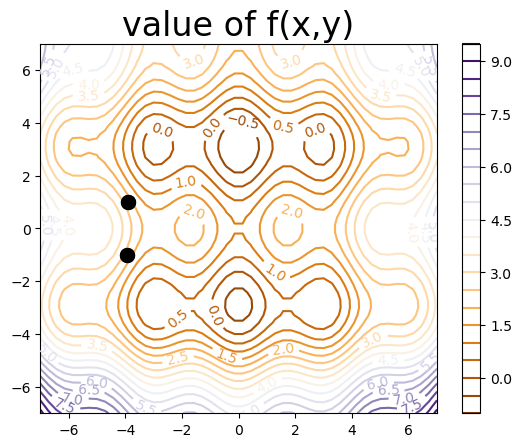

In [38]:

def f1(x,y):
    """np.sin(x) ** 2 + np.cos(y) + 0.08 *x  ** 2 + 0.001 * (y-1) ** 4
    """
    return np.sin(x) ** 2 + np.cos(y) + 0.08 *x  ** 2 + 0.001 * (y-1) ** 4

def f2(x,y):
    """100 * np.sqrt(np.abs(y-0.01* x ** 2)) 
    + 0.01 * np.abs(x+10)
    benchmark func:Bukin function N.6 min = 0 at(-10,1)
"""
    return 100 * np.sqrt(np.abs(y-0.01* x ** 2)) + 0.01 * np.abs(x+10)

def f3(x,y):
    """
     x **2 /10.0 + y ** 2 
    """
    return x **2 /10.0 + y ** 2 

def f4(x,y):
    """
  (x<0) * (x+1) ** 4 +(x >= 0)  *((( y) ** 2 + 8 * (x-2) ** 2) - 5)
    """
    
    return  (x<0) * (x+1) ** 4 +(x >= 0)  *((( y) ** 2 + 8 * (x-2) ** 2) - 5)


opt = Optimizer(f1,-7,7,-7,7)
opt.optimize(-3.9,1,alpha = 0.0,lr=10)
opt.optimize(-3.9,1,alpha = 0.9999,lr=10)

opt.optimize(-3.95,-1,alpha = 0.00,lr=10)
opt.optimize(-3.95,-1,alpha = 0.99995,lr=10)
ani = opt.animate()
ani.save("out.gif",writer='pillow')
